In [1]:

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.cifar10.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

In [3]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [4]:
def build_denoising_autoencoder():
    input_img = layers.Input(shape=(32, 32, 3))

    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = layers.MaxPooling2D((2, 2), padding='same')(x)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
    x = layers.UpSampling2D((2, 2))(x)
    x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = layers.UpSampling2D((2, 2))(x)
    decoded = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = models.Model(input_img, decoded)
    return autoencoder

In [5]:
autoencoder = build_denoising_autoencoder()
autoencoder.compile(optimizer='adam', loss='mse')

autoencoder.fit(
    x_train_noisy, x_train,
    epochs=20,
    batch_size=128,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 19ms/step - loss: 0.0200 - val_loss: 0.0078
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 9ms/step - loss: 0.0076 - val_loss: 0.0068
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0068 - val_loss: 0.0064
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0063 - val_loss: 0.0060
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0060 - val_loss: 0.0058
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0058 - val_loss: 0.0056
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0056 - val_loss: 0.0055
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0055 - val_loss: 0.0055
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0053 - val_loss: 0.0052
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0052 - val_loss: 0.0051
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s

In [8]:
decoded_imgs = autoencoder.predict(x_test_noisy[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step


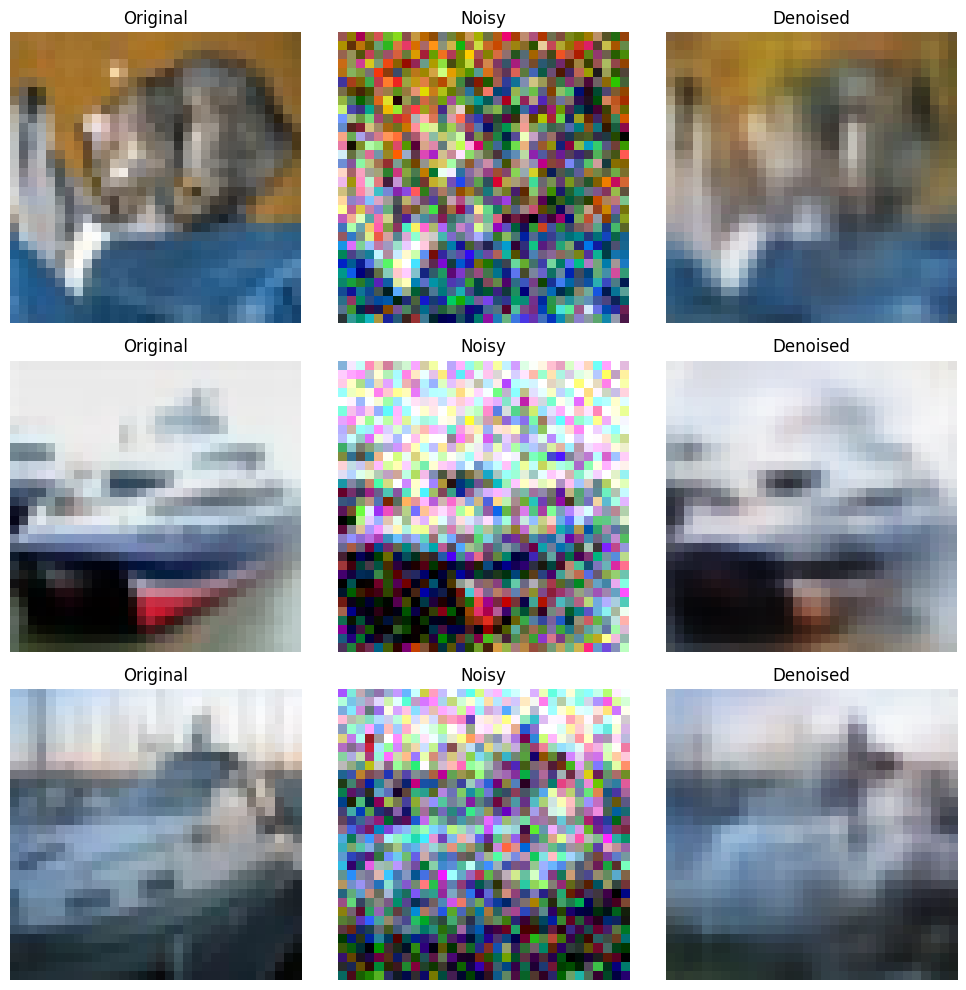

In [12]:
plt.figure(figsize=(10, 10))
for i in range(3):
    ax = plt.subplot(3, 3, i * 3 + 1)
    plt.imshow(x_test[i])
    plt.title("Original")
    plt.axis("off")

    ax = plt.subplot(3, 3, i * 3 + 2)
    plt.imshow(x_test_noisy[i])
    plt.title("Noisy")
    plt.axis("off")


    ax = plt.subplot(3, 3, i * 3 + 3)
    plt.imshow(decoded_imgs[i])
    plt.title("Denoised")
    plt.axis("off")


plt.tight_layout()
plt.show()
